In [1]:
# initial set up
import tensorflow as tf
import tensorflow.keras
import numpy as np
import os
from glob import glob
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image
import skimage
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# setting a gpu
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
# gpus= tf.config.list_physical_devices()
# print(gpus[2])
# tf.config.experimental.set_memory_growth(gpus[2], True)

In [3]:
# define plot process function
def plot_process(acc, val_acc, loss, val_loss):
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')

    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')

    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [4]:
def load_CKPLUS48():
    label_names = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
    images_arr = []
    labels_arr = []
    ini_path = '../Facial expression/data/CK+48'

    for i in range(len(label_names)):
        temp_path = os.path.join(ini_path, label_names[i])
        datas = glob(os.path.join(temp_path, '*.png'))
        for data in datas:
            img = Image.open(data)
            img = img.resize((160, 160))
            img = skimage.img_as_float(img)
            img2 = cv2.merge((img,img,img))

            images_arr.append(img2)
            labels_arr.append(i)
    if (len(images_arr) == 0):
        print("No data loaded")
        return
    print("Successfully find {} data and {} labels".format(len(images_arr), len(labels_arr)))
    print("Each of shape: {}".format(images_arr[0].shape))
    
    train_data, test_data, train_labels, test_labels = train_test_split(images_arr, labels_arr, test_size = 0.2, random_state = 13)
    test_labels = np.asarray(test_labels, dtype=np.float32)
    train_labels = np.asarray(train_labels, dtype=np.float32)
    test_data = np.asarray(test_data, dtype=np.float32)
    train_data = np.asarray(train_data, dtype=np.float32)
    
    print ("X_train shape: " + str(train_data.shape))
    print ("y_train shape: " + str(train_labels.shape))
    print ("X_val shape: " + str(test_data.shape))
    print ("y_val shape: " + str(test_labels.shape))
    
    return train_data, train_labels, test_data, test_labels

In [5]:
def preprocessing_resize(pixels):
    a = []
    
    for i in range(len(pixels)):
            image_string = (pixels)[i].split(' ') 
            image_data = np.asarray(image_string, dtype=np.uint8).reshape(48,48,1)
            image_data = cv2.resize(image_data, dsize=(160, 160), interpolation=cv2.INTER_CUBIC)
            image_data = image_data.reshape(160, 160, 1)
            image_data2 = cv2.merge((image_data, image_data, image_data))
            a.append(image_data2)

    return a

In [6]:
def load_dataset2():
    train_csv = pd.read_csv('../Facial expression/data/data_b/train.csv')
    
    oversample = RandomOverSampler(sampling_strategy='auto')

    X_over, y_over = oversample.fit_resample((train_csv.pixels).values.reshape(-1, 1), train_csv.emotion)

    a = np.array(y_over)
    
    y_over = pd.Series(y_over)
    y_over= y_over.values.reshape(len(y_over),1)
    
    y_over = to_categorical(y_over)

    X_train,X_val,y_train,y_val = train_test_split(X_over,y_over, test_size=0.2)
    
    X_train = pd.Series(X_train.flatten())
    X_train = np.array(preprocessing_resize(X_train))
    
    X_val = pd.Series(X_val.flatten())
    X_val = np.array(preprocessing_resize(X_val))
    
    
    print ("X_train shape: " + str(X_train.shape))
    print ("y_train shape: " + str(y_train.shape))
    print ("X_val shape: " + str(X_val.shape))
    print ("y_val shape: " + str(y_val.shape))
    return X_train, y_train, X_val, y_val
    #return X_train[:5000], y_train[:5000], X_val[:2000], y_val[:2000]

In [7]:
def plot_process(acc, val_acc, loss, val_loss):
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')

    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')

    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [8]:
# X_train, y_train, X_val, y_val = load_CKPLUS48()

In [9]:
# y_val_catagorized = to_categorical(y_val)
# y_train_catagorized = to_categorical(y_train)
# print("y_val_categorized shape" , y_val_catagorized.shape)
# print("y_train_categorized shape" , y_train_catagorized.shape)

In [10]:
# for image, _ in train_dataset.take(1):
#   plt.figure(figsize=(10, 10))
#   first_image = image[0]
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
#     plt.imshow(augmented_image[0].numpy())
#     plt.axis('off')

In [11]:
import pandas as pd
import collections
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

In [12]:
X_train, y_train, X_val, y_val = load_dataset2()

X_train shape: (40404, 160, 160, 3)
y_train shape: (40404, 7)
X_val shape: (10101, 160, 160, 3)
y_val shape: (10101, 7)


In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [14]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

In [15]:
image_resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(160,160),
])

In [16]:
IMG_SHAPE = (160, 160) + (3,)
base_model = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

In [17]:
test_model = tf.keras.models.Sequential()
num_layers = 74
#test_model.add(tf.keras.layers.InputLayer(input_shape=(160, 160, 3), name = 'haha'))
# for i in range(num_layers):
#     test_model.add(base_model.layers[i])
#     test_model.layers[i].trainable = False
#test_model.add(base_model)
for layer in base_model.layers:
    if layer.name == 'conv_dw_10':
        break
    test_model.add(layer)

train_bool = False
for layer in test_model.layers:
    if layer.name == 'conv_dw_9':
        train_bool = True
    layer.trainable = train_bool
test_model.add(tf.keras.layers.GlobalAveragePooling2D())
test_model.add(tf.keras.layers.BatchNormalization())
test_model.add(tf.keras.layers.Dense(7, activation = 'softmax'))
#for l1, l2 in zip(base_model.layers[0:num_layers], test_model.layers[0:num_layers]):
#    l2.set_weights(l1.get_weights())


In [18]:
base_model.summary()

Model: "mobilenet_1.00_160"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 161, 161, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32) 

In [19]:
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 161, 161, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 80, 80, 32)       

In [20]:
# inputs = tf.keras.Input(shape=(48, 48, 3))
# x = tf.keras.layers.experimental.preprocessing.Resizing(160,160)(inputs)
# x = base_model(x, training=False)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# outputs = tf.keras.layers.Dense(1, activation = 'relu')(x)
# model = tf.keras.Model(inputs, outputs)

In [21]:
base_learning_rate = 0.0001
test_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 161, 161, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 80, 80, 32)       

In [22]:
loss0, accuracy0 = test_model.evaluate(val_dataset)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

158/158 [==============================] - 34s 217ms/step - loss: 2.2793 - accuracy: 0.1501
initial loss: 2.28
initial accuracy: 0.15


In [23]:
initial_epochs = 10
history = test_model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=val_dataset)

Epoch 1/10
632/632 [==============================] - 211s 334ms/step - loss: 1.4306 - accuracy: 0.4753 - val_loss: 1.9516 - val_accuracy: 0.3891
Epoch 2/10
632/632 [==============================] - 212s 335ms/step - loss: 1.0800 - accuracy: 0.5981 - val_loss: 1.7718 - val_accuracy: 0.4287
Epoch 3/10
632/632 [==============================] - 213s 337ms/step - loss: 0.9299 - accuracy: 0.6554 - val_loss: 1.6103 - val_accuracy: 0.4821
Epoch 4/10
632/632 [==============================] - 213s 338ms/step - loss: 0.8153 - accuracy: 0.7019 - val_loss: 1.7212 - val_accuracy: 0.4514
Epoch 5/10
632/632 [==============================] - 213s 337ms/step - loss: 0.7206 - accuracy: 0.7429 - val_loss: 2.6419 - val_accuracy: 0.3464
Epoch 6/10
632/632 [==============================] - 214s 338ms/step - loss: 0.6245 - accuracy: 0.7826 - val_loss: 2.7967 - val_accuracy: 0.3779
Epoch 7/10
632/632 [==============================] - 214s 338ms/step - loss: 0.5453 - accuracy: 0.8128 - val_loss: 2.6164 -

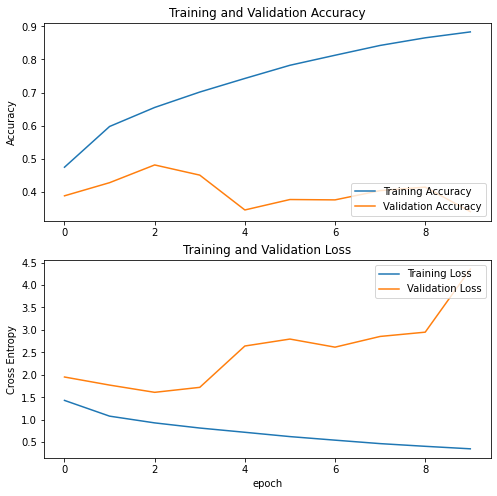

In [25]:
histories={}
histories[1] = history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plot_process(acc, val_acc, loss, val_loss)

In [26]:
test_model.save_weights('weight1.h5')

In [27]:
train_bool = False
for layer in test_model.layers:
    if layer.name == 'conv_pw_9_relu':
        train_bool = True
    layer.trainable = train_bool
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 161, 161, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 80, 80, 32)       

In [28]:
base_learning_rate = 0.0001
test_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 161, 161, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 80, 80, 32)       

In [29]:
initial_epochs = 10
history = test_model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=val_dataset)

Epoch 1/10
632/632 [==============================] - 178s 281ms/step - loss: 0.2489 - accuracy: 0.9217 - val_loss: 0.8067 - val_accuracy: 0.7670
Epoch 2/10
632/632 [==============================] - 180s 284ms/step - loss: 0.2227 - accuracy: 0.9300 - val_loss: 0.8414 - val_accuracy: 0.7681
Epoch 3/10
632/632 [==============================] - 237s 374ms/step - loss: 0.2129 - accuracy: 0.9311 - val_loss: 0.8671 - val_accuracy: 0.7691
Epoch 4/10
632/632 [==============================] - 224s 354ms/step - loss: 0.2072 - accuracy: 0.9329 - val_loss: 0.8884 - val_accuracy: 0.7710
Epoch 5/10
632/632 [==============================] - 213s 336ms/step - loss: 0.2037 - accuracy: 0.9324 - val_loss: 0.9029 - val_accuracy: 0.7711
Epoch 6/10
238/632 [==========>...................] - ETA: 1:45 - loss: 0.2467 - accuracy: 0.9181

KeyboardInterrupt: 

In [ ]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
len(model.trainable_variables)

In [ ]:
index = 2
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history = model.fit(train_dataset, 
                    epochs=total_epochs, 
                    initial_epoch=history.epoch[-1], 
                    validation_data=val_dataset)

In [ ]:
histories[index] = history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plot_process(acc, val_acc, loss, val_acc)
index += 1

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

In [ ]:
checkpoint_path = "../training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
print(checkpoint_dir)

In [ ]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
fine_tune_epochs = 3
total_epochs =  20
history= histories[2]

history = model.fit(train_dataset, 
                    epochs=total_epochs, 
                    initial_epoch=history.epoch[-1], 
                    validation_data=val_dataset,
                    callbacks=[cp_callback])

In [ ]:
model.save_weights(checkpoint_path)